In [90]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from kernels_class import *
from rbf_kernel import *
import seaborn as sns
from scipy.stats import wishart

In [91]:
def kl_mvn(mu0, Sigma0, mu1, Sigma1):
    """
    KL divergence between N(mu0, Sigma0) and N(mu1, Sigma1).
    """
    d = mu0.shape[0]

    # Inverses and determinants
    inv_Sigma1 = np.linalg.inv(Sigma1)
    det_Sigma0 = np.linalg.det(Sigma0)
    det_Sigma1 = np.linalg.det(Sigma1)

    # Trace term
    trace_term = np.trace(inv_Sigma1 @ Sigma0)

    # Mean difference term
    diff = mu1 - mu0
    mean_term = diff.T @ inv_Sigma1 @ diff

    # Final KL
    kl = 0.5 * (trace_term + mean_term - d + np.log(det_Sigma1 / det_Sigma0))
    return kl

In [92]:
n_source_plus = 500
n_source_minus = 500

n_target = 1000

# pi_target = 0.3

r =(1/n_source_plus + 1/n_source_minus + 1/n_target)

In [93]:
gamma_seq = np.linspace(0.001, 0.1, 100)
p_seq = [5, 10, 15, 20, 25,30, 35, 40, 45, 50]
N = 100
res = np.zeros(shape=(len(p_seq), 100, N))

In [94]:
for i in tqdm(range(N)):
    for p_ind in range(len(p_seq)):
        p = p_seq[p_ind]
        
        mu0 = np.zeros(p)
        mu1 = np.random.normal(size=p)
        Sigma0 = np.eye(p)
        df = 2*p 
        scale = np.eye(p)
        Sigma1 =  wishart.rvs(df=df, scale=scale, size=1)
        pi_target = np.random.uniform(0,1,size=1)
        for gamma_ind in range(100):
            gamma = gamma_seq[gamma_ind]
            
            var_est, tar_est, pos_est, neg_est = variance_for_rbf(mu0, Sigma0, mu1, Sigma1, pi_target,
                                                                1/(r*n_target),
                                                                1/(r*n_source_plus),
                                                                1/(r*n_source_minus), 
                                                                gamma=gamma)
            res[p_ind, gamma_ind, i] = var_est


  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_1563340/3773638124.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[p_ind, gamma_ind, i] = var_est
100%|██████████| 100/100 [02:46<00:00,  1.67s/it]


In [5]:
# for i in range(4):
#     plt.plot(gamma_seq, res[i,:,:], color='C'+str(i))
#     plt.vlines(np.mean(gamma_seq[np.argmin(res[i,:,:], axis=0)]), 0, 1, color='C'+str(i))

(0.0, 1.05)

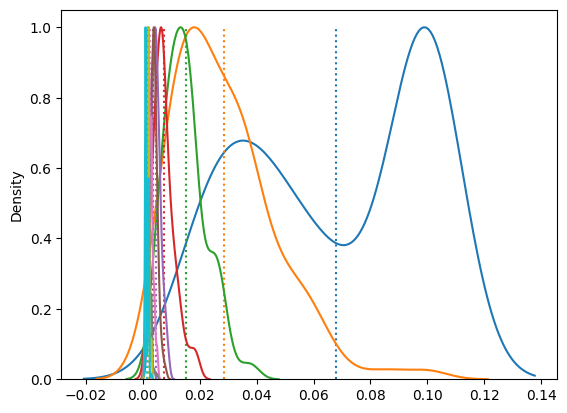

In [95]:
for i in range(len(p_seq)):
    # plt.plot(gamma_seq, res[i,:,:], color='C'+str(i))
    ax = sns.kdeplot(gamma_seq[np.argmin(res[i,:,:], axis=0)], color='C'+str(i))
    for line in ax.lines:
        ydata = line.get_ydata()
        line.set_ydata(ydata / ydata.max())
    ax.vlines(np.mean(gamma_seq[np.argmin(res[i,:,:], axis=0)]), 0, 1, color='C'+str(i), linestyle='dotted')
plt.ylim(0,1.05)

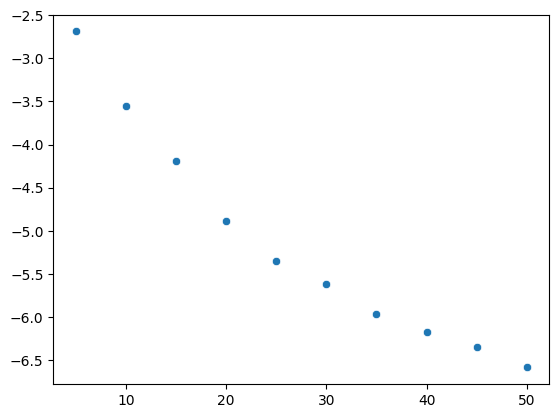

In [101]:
sns.scatterplot(x=p_seq, y=np.log(np.mean(gamma_seq[np.argmin(res[:,:,:], axis=1)], axis=1)))
# sns.scatterplot(x=p_seq, y=1/(np.mean(gamma_seq[np.argmin(res[:,:,:], axis=1)], axis=1)))
# x_seq = np.array(p_seq)
# y_seq = np.exp(x_seq/10)
# plt.plot(x_seq, y_seq)
plt.show()

In [79]:
n_source_plus = 500
n_source_minus = 500

n_target = 1000

# pi_target = 0.3

r =(1/n_source_plus + 1/n_source_minus + 1/n_target)

In [84]:
gamma_seq = np.linspace(0.001, 0.1, 100)
p_seq = [5, 10, 15, 20]
N = 100
res = np.zeros(shape=(len(p_seq), 100, N))
res2 = np.zeros(shape=(len(p_seq), 100, N))

In [ ]:
for i in tqdm(range(N)):
    for p_ind in range(len(p_seq)):
        p = p_seq[p_ind]
        
        mu0 = np.zeros(p)
        mu1 = np.random.normal(size=p)
        Sigma0 = np.eye(p)
        Sigma1 =  np.eye(p)
        pi_target = np.random.uniform(0,1,size=1)
        for gamma_ind in range(100):
            gamma = gamma_seq[gamma_ind]
            
            var_est, tar_est, pos_est, neg_est = variance_for_rbf(mu0, Sigma0, mu1, Sigma1, pi_target,
                                                                1/(r*n_target),
                                                                1/(r*n_source_plus),
                                                                1/(r*n_source_minus), 
                                                                gamma=gamma)
            res[p_ind, gamma_ind, i] = var_est
        res2[p_ind, i] = kl_mvn(mu0, Sigma0, mu1, Sigma1)


  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_1563340/2167486484.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[p_ind, gamma_ind, i] = var_est
100%|██████████| 100/100 [00:13<00:00,  7.34it/s]


(0.0, 1.05)

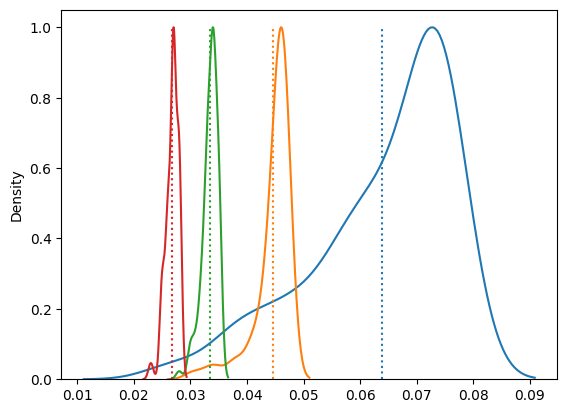

In [86]:
for i in range(len(p_seq)):
    # plt.plot(gamma_seq, res[i,:,:], color='C'+str(i))
    ax = sns.kdeplot(gamma_seq[np.argmin(res[i,:,:], axis=0)], color='C'+str(i))
    for line in ax.lines:
        ydata = line.get_ydata()
        line.set_ydata(ydata / ydata.max())
    ax.vlines(np.mean(gamma_seq[np.argmin(res[i,:,:], axis=0)]), 0, 1, color='C'+str(i), linestyle='dotted', label=p_seq[i])
plt.ylim(0,1.05)

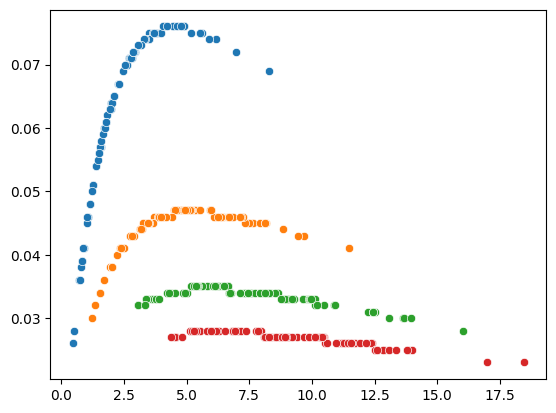

In [89]:
for i in range(len(p_seq)):
    # plt.plot(gamma_seq, res[i,:,:], color='C'+str(i))
    ax = sns.scatterplot(x=res2[i,0,:],y=gamma_seq[np.argmin(res[i,:,:], axis=0)], color='C'+str(i))

In [36]:
np.mean(gamma_seq[np.argmin(res[:,:,:], axis=1)], axis=1)

array([0.06361, 0.02785, 0.01407, 0.0075 , 0.00497, 0.00136])

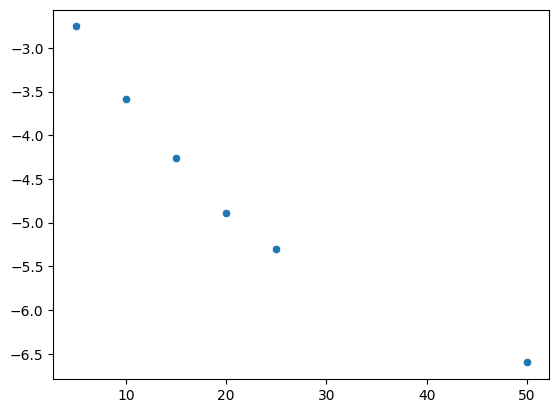

In [58]:
sns.scatterplot(x=p_seq, y=np.log(np.mean(gamma_seq[np.argmin(res[:,:,:], axis=1)], axis=1)))
# x_seq = np.array(p_seq)
# y_seq = np.exp(x_seq/10)
# plt.plot(x_seq, y_seq)
plt.show()

In [59]:
n_source_plus = 500
n_source_minus = 500

n_target = 1000

p = 20

r =(1/n_source_plus + 1/n_source_minus + 1/n_target)

In [ ]:
gamma_seq = np.linspace(0.001, 0.1, 100)
pi_target_seq = [0.1, 0.3, 0.5, 0.7, 0.9]
N = 100
res = np.zeros(shape=(len(pi_target_seq), 100, N))

In [65]:
for i in tqdm(range(N)):
    for pi_target_ind in range(len(pi_target_seq)):
        pi_target = pi_target_seq[pi_target_ind]
        
        mu0 = np.zeros(p)
        mu1 = np.random.normal(size=p)
        Sigma0 = np.eye(p)
        df = 2*p 
        scale = np.eye(p)
        Sigma1 =  wishart.rvs(df=df, scale=scale, size=1)
        pi_target = np.random.uniform(0,1,size=1)
        for gamma_ind in range(100):
            gamma = gamma_seq[gamma_ind]
            
            var_est, tar_est, pos_est, neg_est = variance_for_rbf(mu0, Sigma0, mu1, Sigma1, pi_target,
                                                                1/(r*n_target),
                                                                1/(r*n_source_plus),
                                                                1/(r*n_source_minus), 
                                                                gamma=gamma)
            res[pi_target_ind, gamma_ind, i] = var_est


  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_1563340/2826846095.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[pi_target_ind, gamma_ind, i] = var_est
100%|██████████| 100/100 [00:19<00:00,  5.13it/s]


(0.0, 1.05)

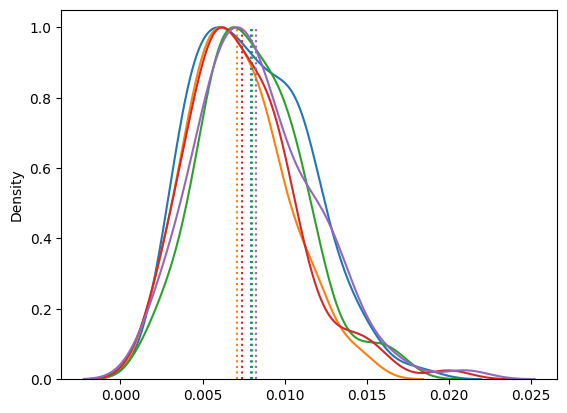

In [68]:
for i in range(len(pi_target_seq)):
    # plt.plot(gamma_seq, res[i,:,:], color='C'+str(i))
    ax = sns.kdeplot(gamma_seq[np.argmin(res[i,:,:], axis=0)], color='C'+str(i))
    for line in ax.lines:
        ydata = line.get_ydata()
        line.set_ydata(ydata / ydata.max())
    ax.vlines(np.mean(gamma_seq[np.argmin(res[i,:,:], axis=0)]), 0, 1, color='C'+str(i), linestyle='dotted')
plt.ylim(0,1.05)

In [69]:
n_source_plus = 500
n_source_minus = 500

n_target = 1000

p = 20
# pi_target = 0.5

r =(1/n_source_plus + 1/n_source_minus + 1/n_target)

In [74]:
gamma_seq = np.linspace(0.001, 0.1, 100)
mu1_seq = [0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 10]
N = 100
res = np.zeros(shape=(len(mu1_seq), 100, N))

In [75]:
for i in tqdm(range(N)):
    for mu1_ind in range(len(mu1_seq)):
        mu1= mu1_seq[mu1_ind]*np.ones(p)
        
        mu0 = np.zeros(p)
        Sigma0 = np.eye(p)
        df = 2*p 
        scale = np.eye(p)
        Sigma1 =  wishart.rvs(df=df, scale=scale, size=1)
        pi_target = np.random.uniform(0,1,size=1)
        for gamma_ind in range(100):
            gamma = gamma_seq[gamma_ind]
            
            var_est, tar_est, pos_est, neg_est = variance_for_rbf(mu0, Sigma0, mu1, Sigma1, pi_target,
                                                                1/(r*n_target),
                                                                1/(r*n_source_plus),
                                                                1/(r*n_source_minus), 
                                                                gamma=gamma)
            res[mu1_ind, gamma_ind, i] = var_est


  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_1563340/869496292.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[mu1_ind, gamma_ind, i] = var_est
100%|██████████| 100/100 [00:35<00:00,  2.79it/s]


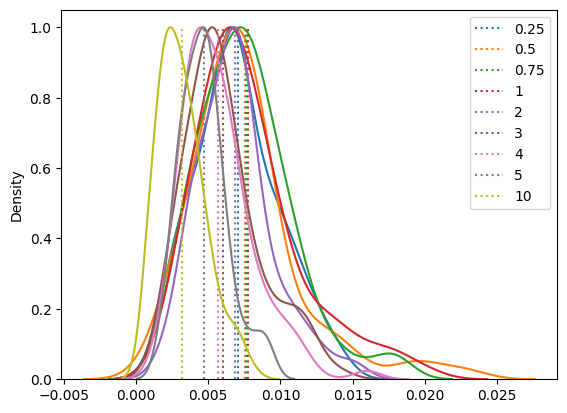

In [78]:
for i in range(len(mu1_seq)):
    # plt.plot(gamma_seq, res[i,:,:], color='C'+str(i))
    ax = sns.kdeplot(gamma_seq[np.argmin(res[i,:,:], axis=0)], color='C'+str(i))
    for line in ax.lines:
        ydata = line.get_ydata()
        line.set_ydata(ydata / ydata.max())
    ax.vlines(np.mean(gamma_seq[np.argmin(res[i,:,:], axis=0)]), 0, 1, color='C'+str(i), linestyle='dotted', label=mu1_seq[i])
plt.ylim(0,1.05)
plt.legend()